In [1]:
# libs Necessárias

# Libs para modelagem e matrizes
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns


# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings("ignore")

In [2]:
# Lendo dados
base_dados = pd.read_csv("Projeto4PS4_GamesSales.csv", encoding="latin-1")

# Verificando
base_dados.head()

#está em milhões de unidades

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimensão da base de dados
base_dados.shape

(1034, 9)

In [4]:
# Campos nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

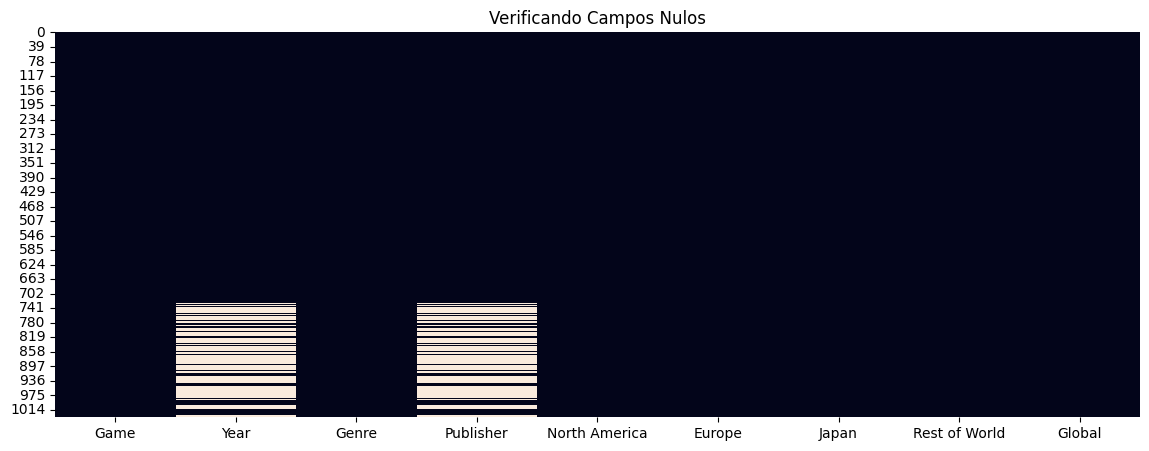

In [5]:
# Nulos gráficos
plt.figure(figsize=(14,5))
plt.title("Verificando Campos Nulos")
sns.heatmap(base_dados.isnull(), cbar=False);

In [6]:
# Retirar Valores Nulos da Base de Dados
base_dados.dropna(inplace=True)
# O inplace já aplica diretamente na base de dados a alteração

In [7]:
# Estatísticas
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


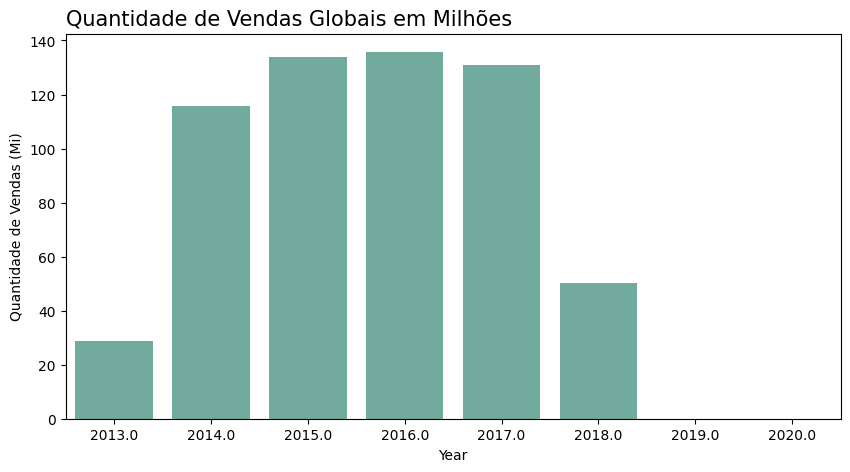

In [8]:
# Tamanho da Imagem
plt.figure(figsize=(10,5))

# Título do Gráfico
plt.title("Quantidade de Vendas Globais em Milhões", loc="left", fontsize=15)

# Gráfico
sns.barplot(data=base_dados, x="Year", y="Global", ci=None, color="#69b3a2", estimator=sum)
# o parametro "ci" serve para tirar a barrinha cinza do meio do gráfico
# Estimator mudou a escala do gráfico

# Label
plt.ylabel("Quantidade de Vendas (Mi)");

In [9]:
# Retirar os anos que estão sobrando do gráfico
base_dados = base_dados.loc[(base_dados["Year"] != 2019) & (base_dados["Year"] != 2020)]
# Localisa na base de dados na coluna "ano" e mostra todos os dados que não sejam
#de 2019 E de 2020

# Verificar
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


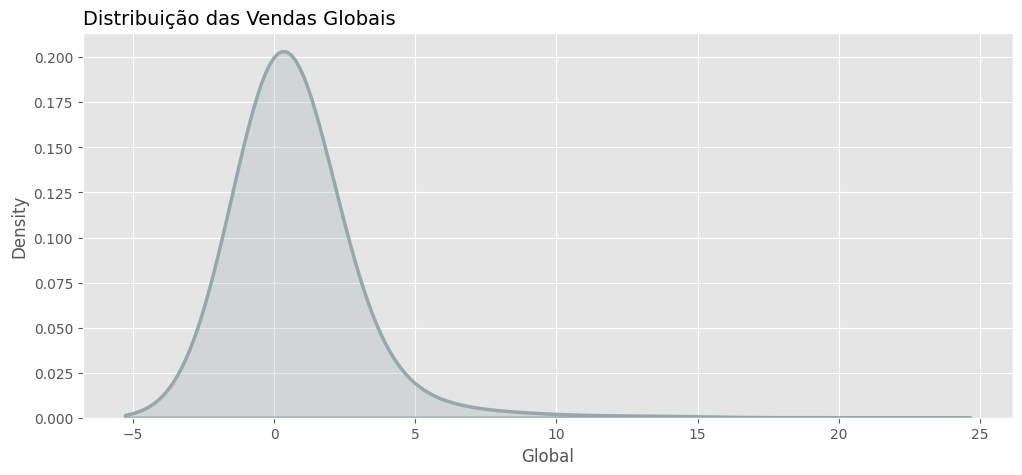

In [10]:
# Tamanho do Gráfico
plt.figure(figsize=(12,5))

# Estilo
plt.style.use("ggplot")
#retorna a densidade

# Título
plt.title("Distribuição das Vendas Globais", loc="left", fontsize=14)

# Plot
sns.kdeplot(base_dados["Global"], shade=True, bw=1, color="#96a8a8", linewidth=2.5);
# shade serve para fazer a sombra abaixo da linha
#bw opacidade da sombra
# o último parametro é a espessura da linha que foi usada

In [11]:
# Distribuição agrupada por ano
analise = base_dados.groupby(by=["Year"]).sum()
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


<Axes: title={'left': 'Distribuição de Vendas por ano'}, xlabel='Year', ylabel='Global'>

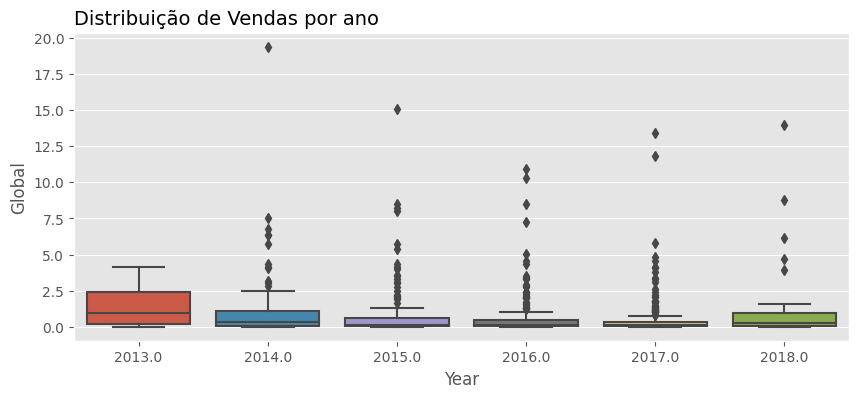

In [12]:
# Tamanho da Imagem
plt.figure(figsize=(10,4))

# Título
plt.title("Distribuição de Vendas por ano", loc="left", fontsize=14)

# Plot
sns.boxplot(data=base_dados, x="Year", y="Global")

In [13]:
base_dados.loc[base_dados["Global"]>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [14]:
base_dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [15]:
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


In [16]:
# ANALISANDO A PROPORÇÃO DOS 100% DE CADA CONTINENTE COMPARADO AO TOTAL
# Nesse passo está pegando os valores correspondentes a uma região, dividindo pela situação global
# multiplicando isso por 100 para saber a porcentagem

America = [America / Total * 100 for America, Total in zip(analise["North America"], analise["Global"])]
Europa = [Europa / Total * 100 for Europa, Total in zip(analise["Europe"], analise["Global"])]
Japao = [Japao / Total * 100 for Japao, Total in zip(analise["Japan"], analise["Global"])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(analise["Rest of World"], analise["Global"])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [17]:
analise.index

Float64Index([2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0], dtype='float64', name='Year')

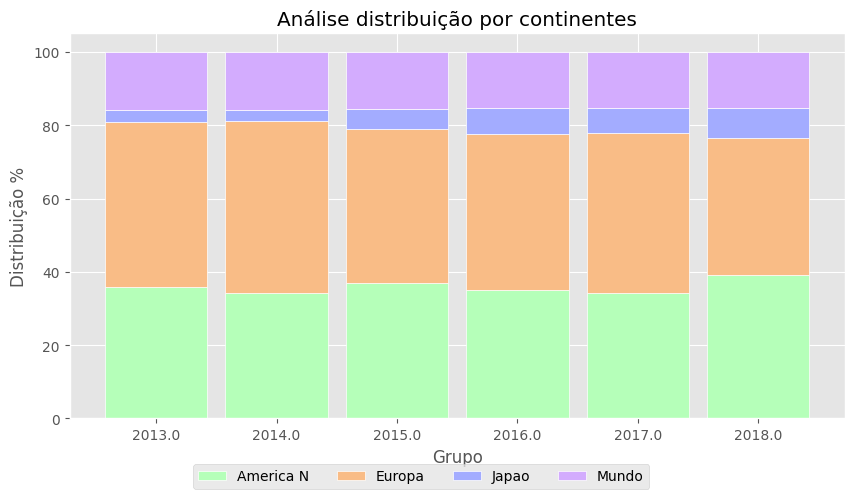

In [18]:
# Grafico de Barra empilhada

# Tamanho
plt.figure(figsize=(10,5))

# Título
plt.title("Análise distribuição por continentes")

#Largura barra do gráfico
largura_barra = 0.85
#rotulos = analise["Year"] TIVE QUE TROCAR PELO COMANDO "analise.index"
grupos = [0, 1, 2, 3, 4, 5]


#plot da América
plt.bar(grupos, America, width=largura_barra, color="#b5ffb9", edgecolor="white")

#plot da Europa
plt.bar(grupos, Europa, bottom=America, width=largura_barra, color="#f9bc86", edgecolor="white")

#plot da Japao
plt.bar(grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=largura_barra, color="#a3acff", edgecolor="white")

#plot da Resto do mundo
plt.bar(grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color="#d3acfe", edgecolor="white")

#Label
plt.xticks(grupos, analise.index)
plt.xlabel("Grupo")
plt.ylabel("Distribuição %")

# Legenda
plt.legend(["America N", "Europa", "Japao", "Mundo"], loc="upper left", bbox_to_anchor=(0.15, -0.1), ncol=4);

In [19]:
base_dados["Publisher"].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

<Axes: xlabel='Publisher', ylabel='Global'>

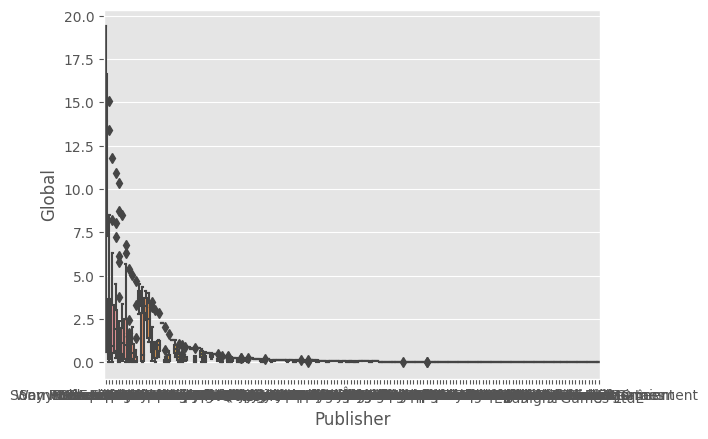

In [20]:
sns.boxplot(data=base_dados, x="Publisher", y="Global")

In [21]:
# a biblioteca pega cada dado da coluna e numera de 1 até a quantidade total de nomes, definindo cada um com um número diferente
from sklearn.preprocessing import LabelEncoder

In [22]:
funcao_label = LabelEncoder()

funcao_label.fit_transform(base_dados["Publisher"])


array([107,   8, 107,   8,  40,  41, 113, 113,   8,  19,  40,  41,   8,
        41, 112, 112,  40, 113, 113,   8, 112,  86, 117,   8,  25,  23,
        41, 140, 140, 140,   8, 140,   8, 144, 140, 140,   1, 140,  41,
       113, 140,   1, 145,  40,  19, 140,   1,  25,  40,  40, 145, 140,
       140, 112,  70, 112, 112,  19,   0,  23, 140,  41,  40,   1, 144,
        86, 113, 112, 113,  41,  61,  40,  41,   8,  41, 113,  41, 117,
       112,  19, 145, 117,   3, 117,  19, 145, 112, 112,  19, 140, 117,
       140,  41, 145, 117,  86,  35, 112,  19, 113,  86,   1, 117,  86,
       140,  41,  86, 140,  41,  25,  19,   1, 145,  40, 113, 122,   0,
        18,   0,   8,  70, 145, 113, 117,  86, 145, 145,   1, 113, 145,
        19, 145,  41, 117, 108, 113,  19,  19, 117, 129, 112, 140, 145,
         0, 145,  40,  40, 112, 145, 117,  86, 112,  55, 145,  84,   0,
       117, 113,  37,  45, 140,  70, 119, 117, 140, 117,   8,  27, 117,
        70, 145,  70,  37,  70,   3, 112, 113, 117, 145,  25,  8

In [23]:
# Adicionei mais uma coluna na minha base de dados com o as novas definições

base_dados["Produtor"] = funcao_label.fit_transform(base_dados["Publisher"])
base_dados["Genero"] = funcao_label.fit_transform(base_dados["Genre"])
base_dados["Jogo"] = funcao_label.fit_transform(base_dados["Game"])


base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [24]:
paleta_cores = sns.color_palette("inferno", 8)
paleta_cores

[(0.104551, 0.047008, 0.25343),
 (0.290763, 0.045644, 0.418637),
 (0.472328, 0.110547, 0.428334),
 (0.64626, 0.173914, 0.378359),
 (0.812239, 0.266786, 0.274661),
 (0.929644, 0.411479, 0.145367),
 (0.985315, 0.608422, 0.024202),
 (0.969783, 0.820825, 0.238686)]

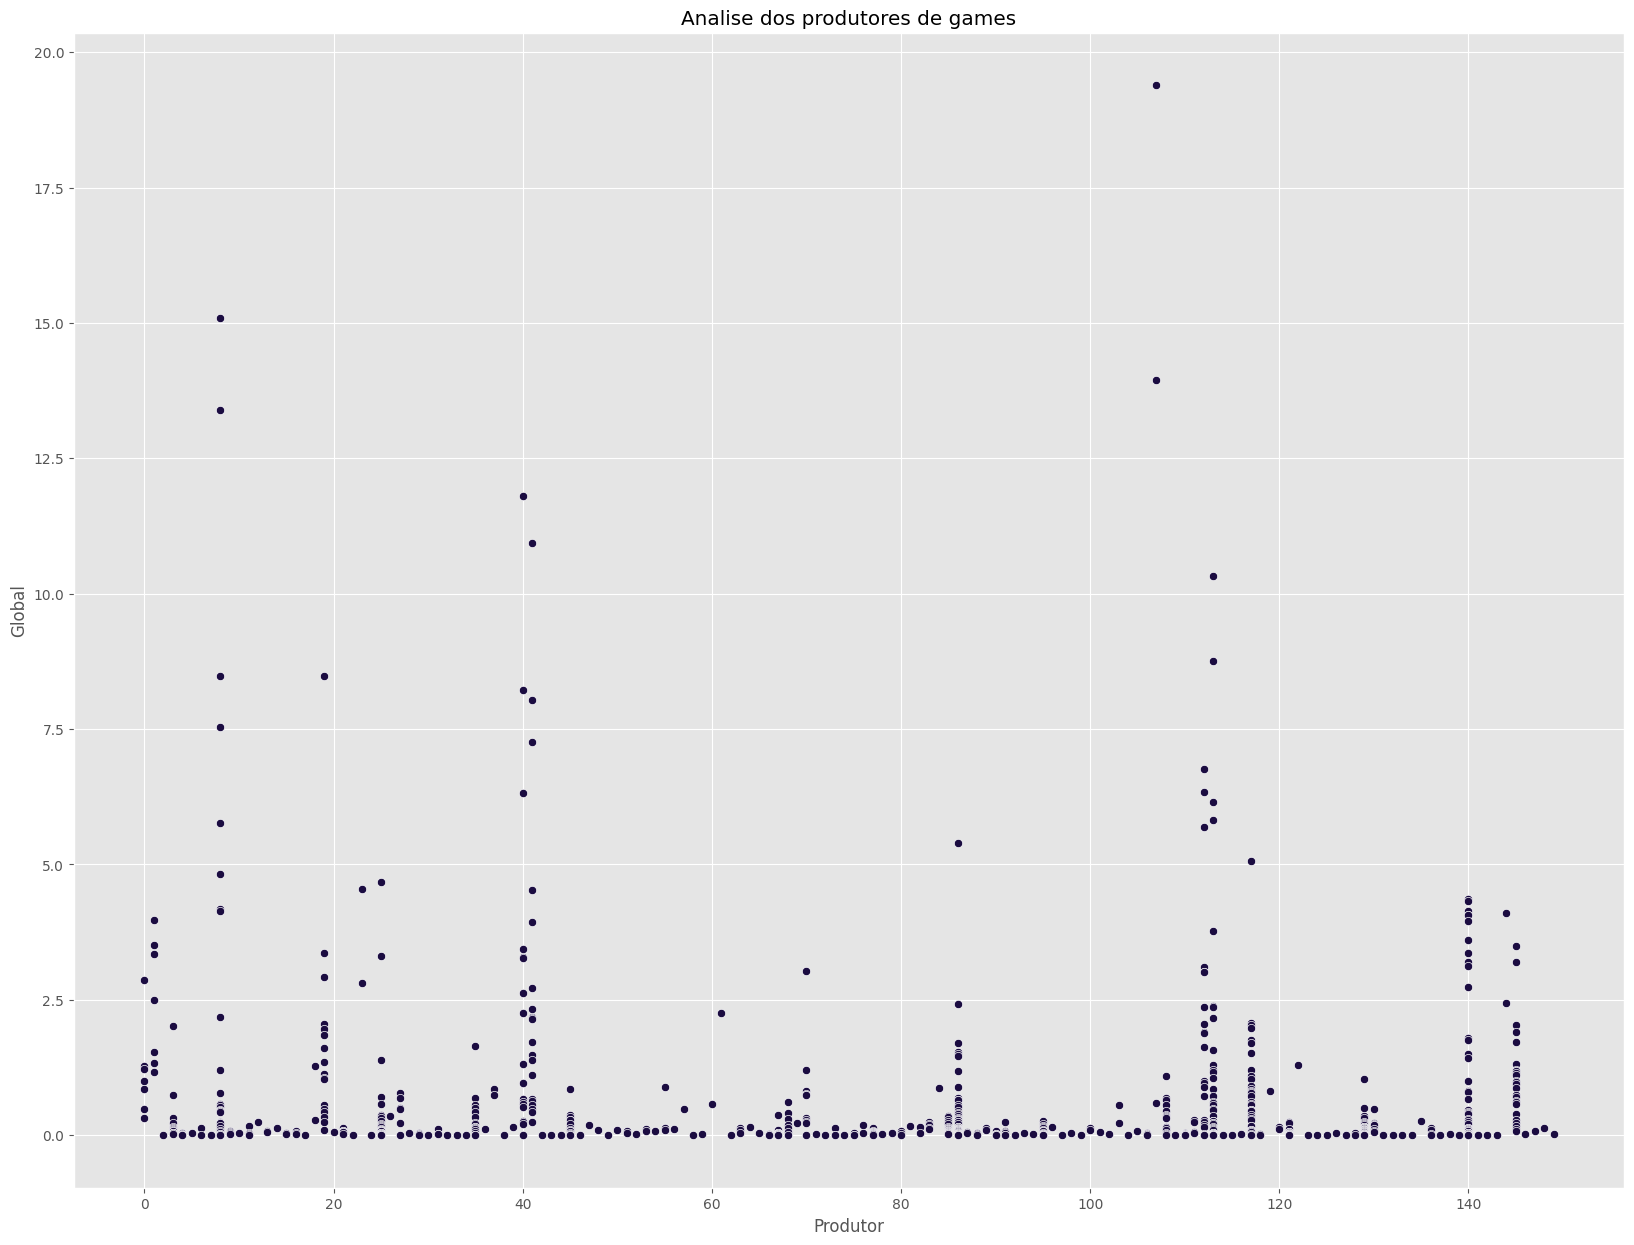

In [25]:
plt.figure(figsize=(20,15))
plt.title("Analise dos produtores de games")
sns.scatterplot(data=base_dados, x="Produtor", y="Global", color=paleta_cores[0]);

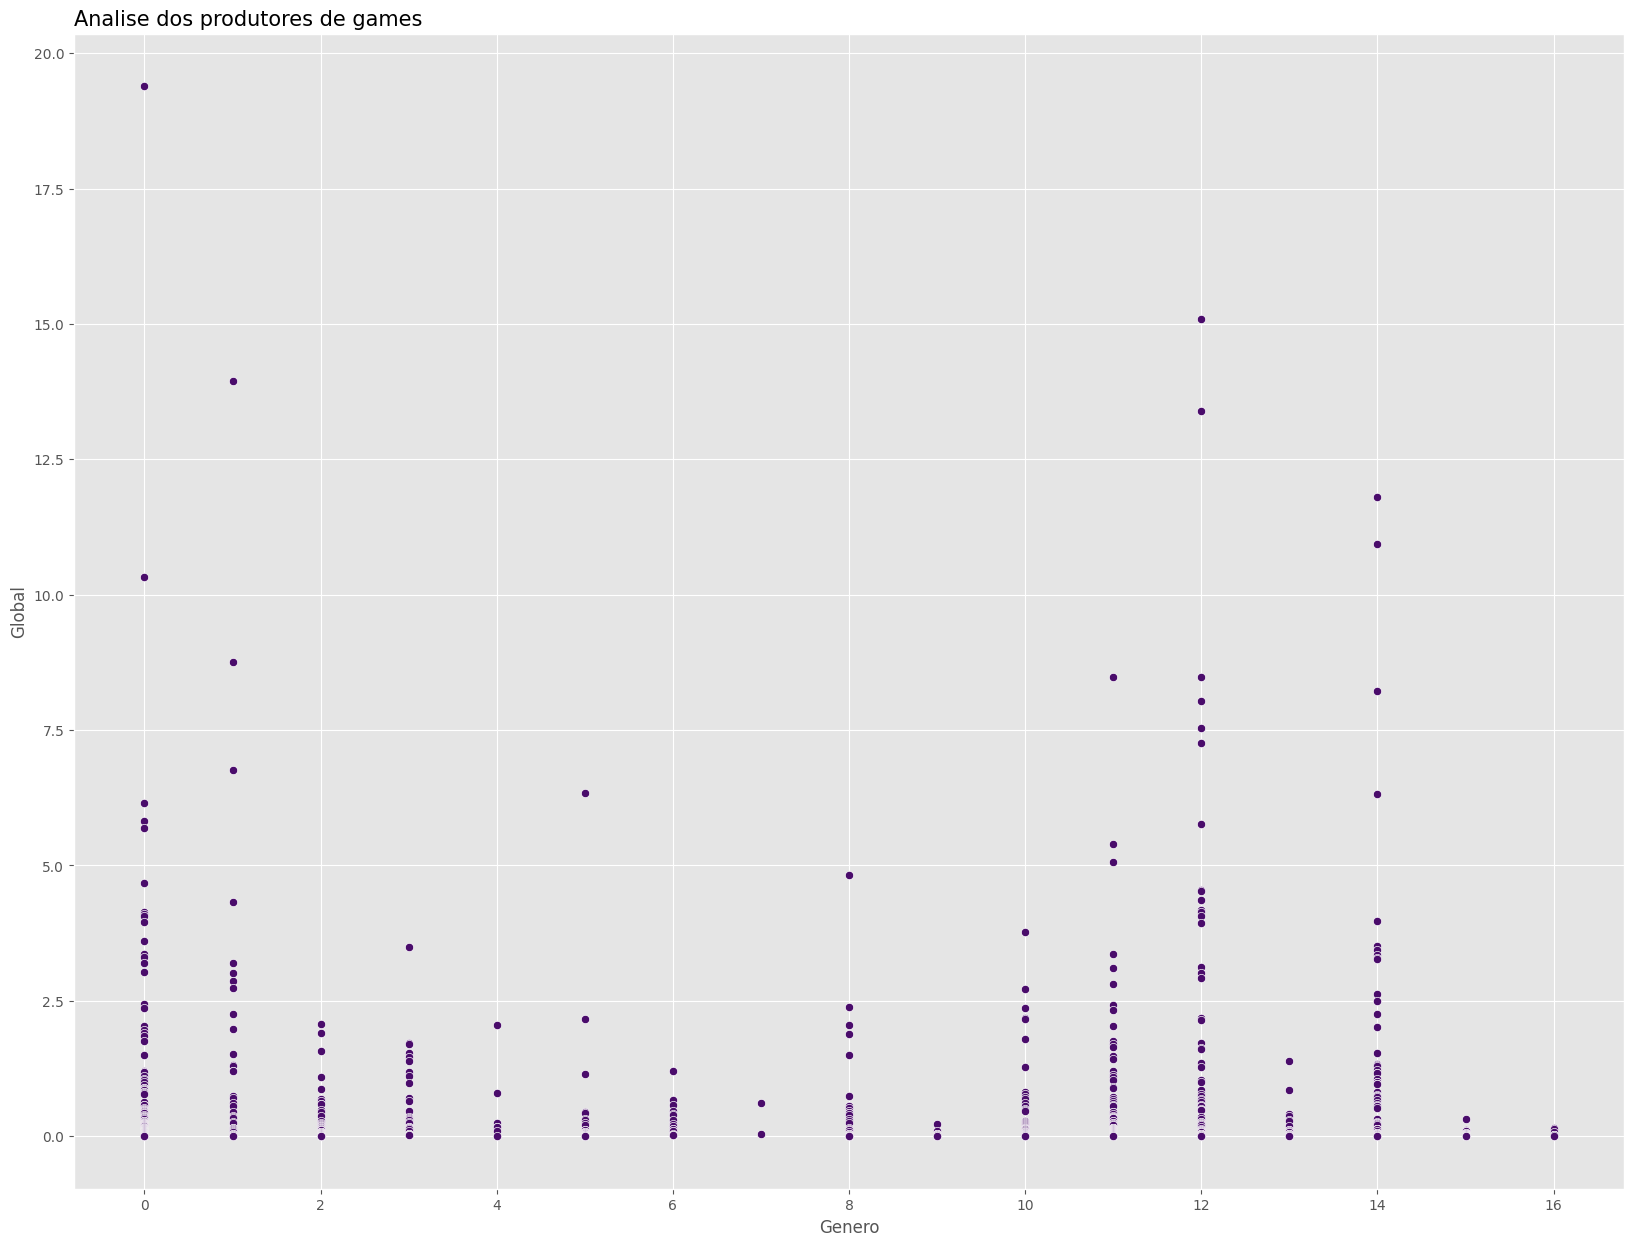

In [26]:
plt.figure(figsize=(20,15))
plt.title("Analise dos produtores de games", loc="left", fontsize=15)
sns.scatterplot(data=base_dados, x="Genero", y="Global", color=paleta_cores[1]);

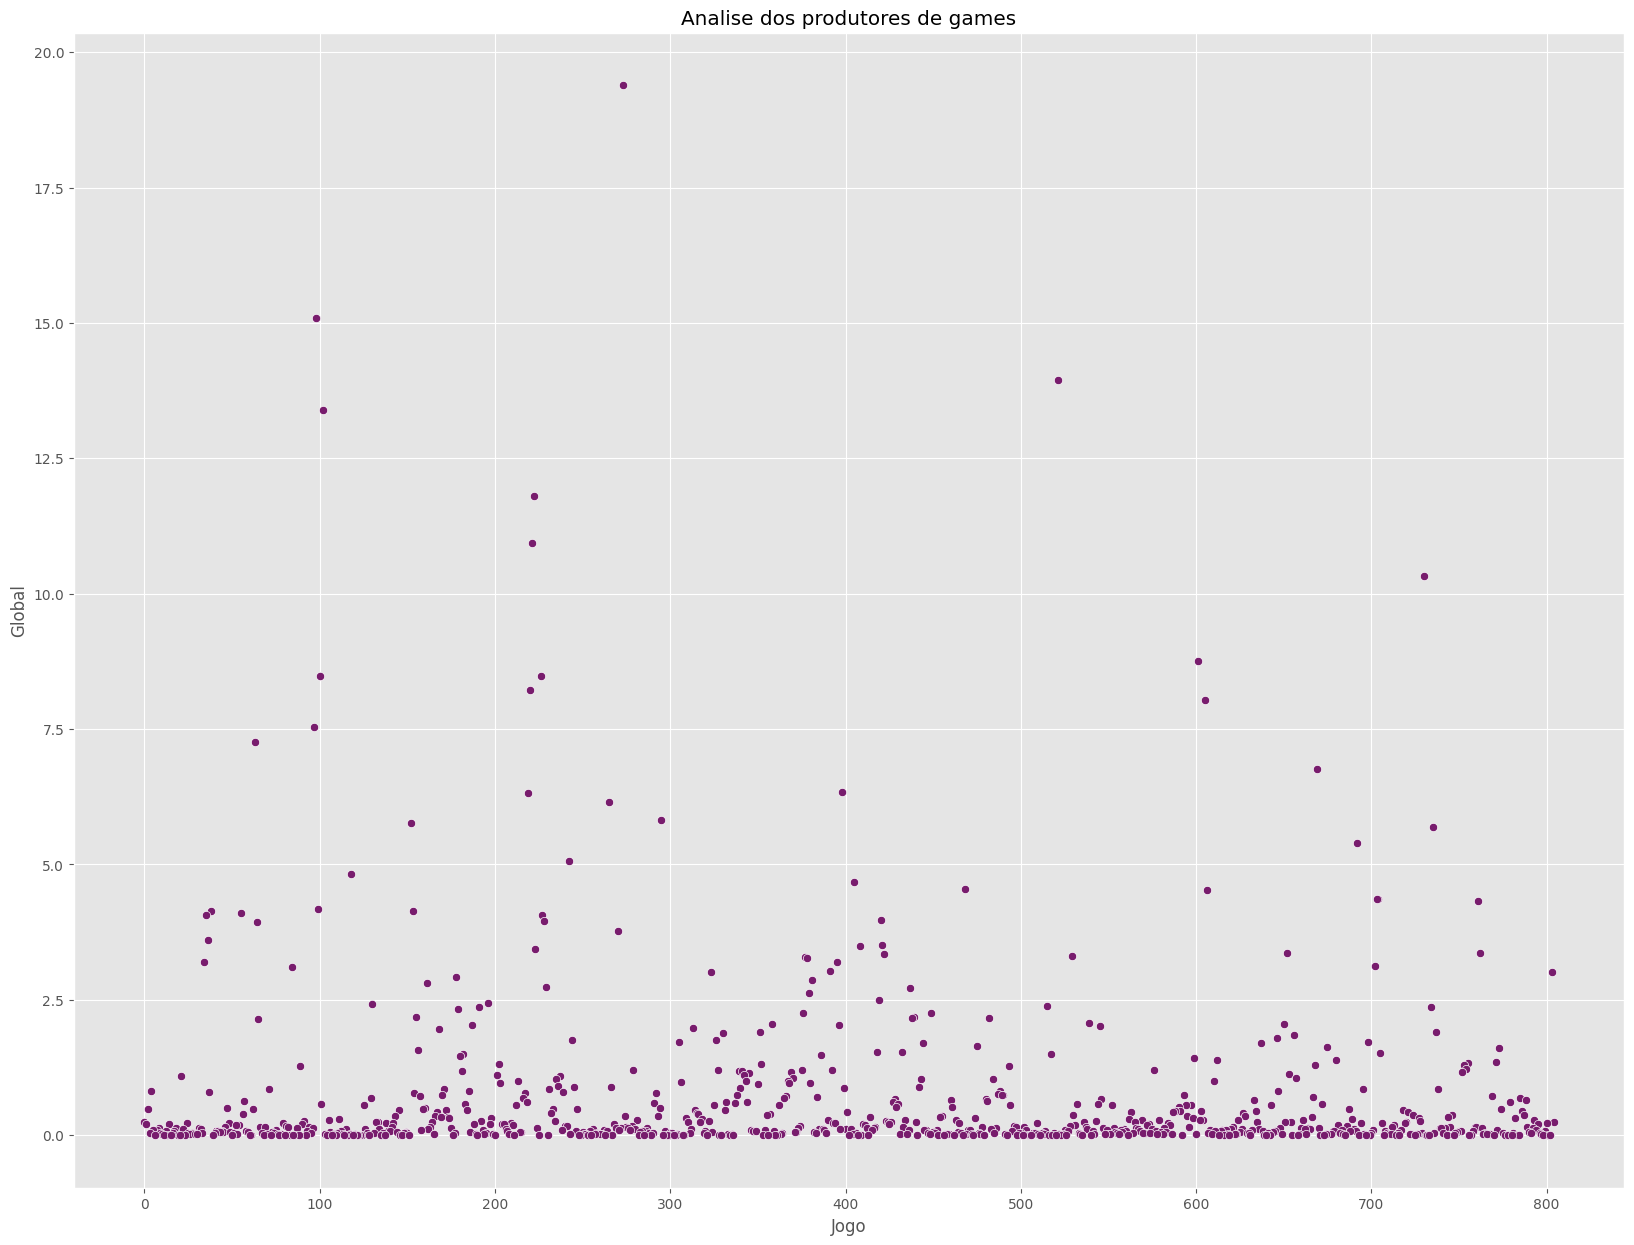

In [27]:
plt.figure(figsize=(20,15))
plt.title("Analise dos produtores de games")
sns.scatterplot(data=base_dados, x="Jogo", y="Global", color=paleta_cores[2]);

In [28]:
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE
# RELATÓRIO --> REPORT PARA O CHEFE

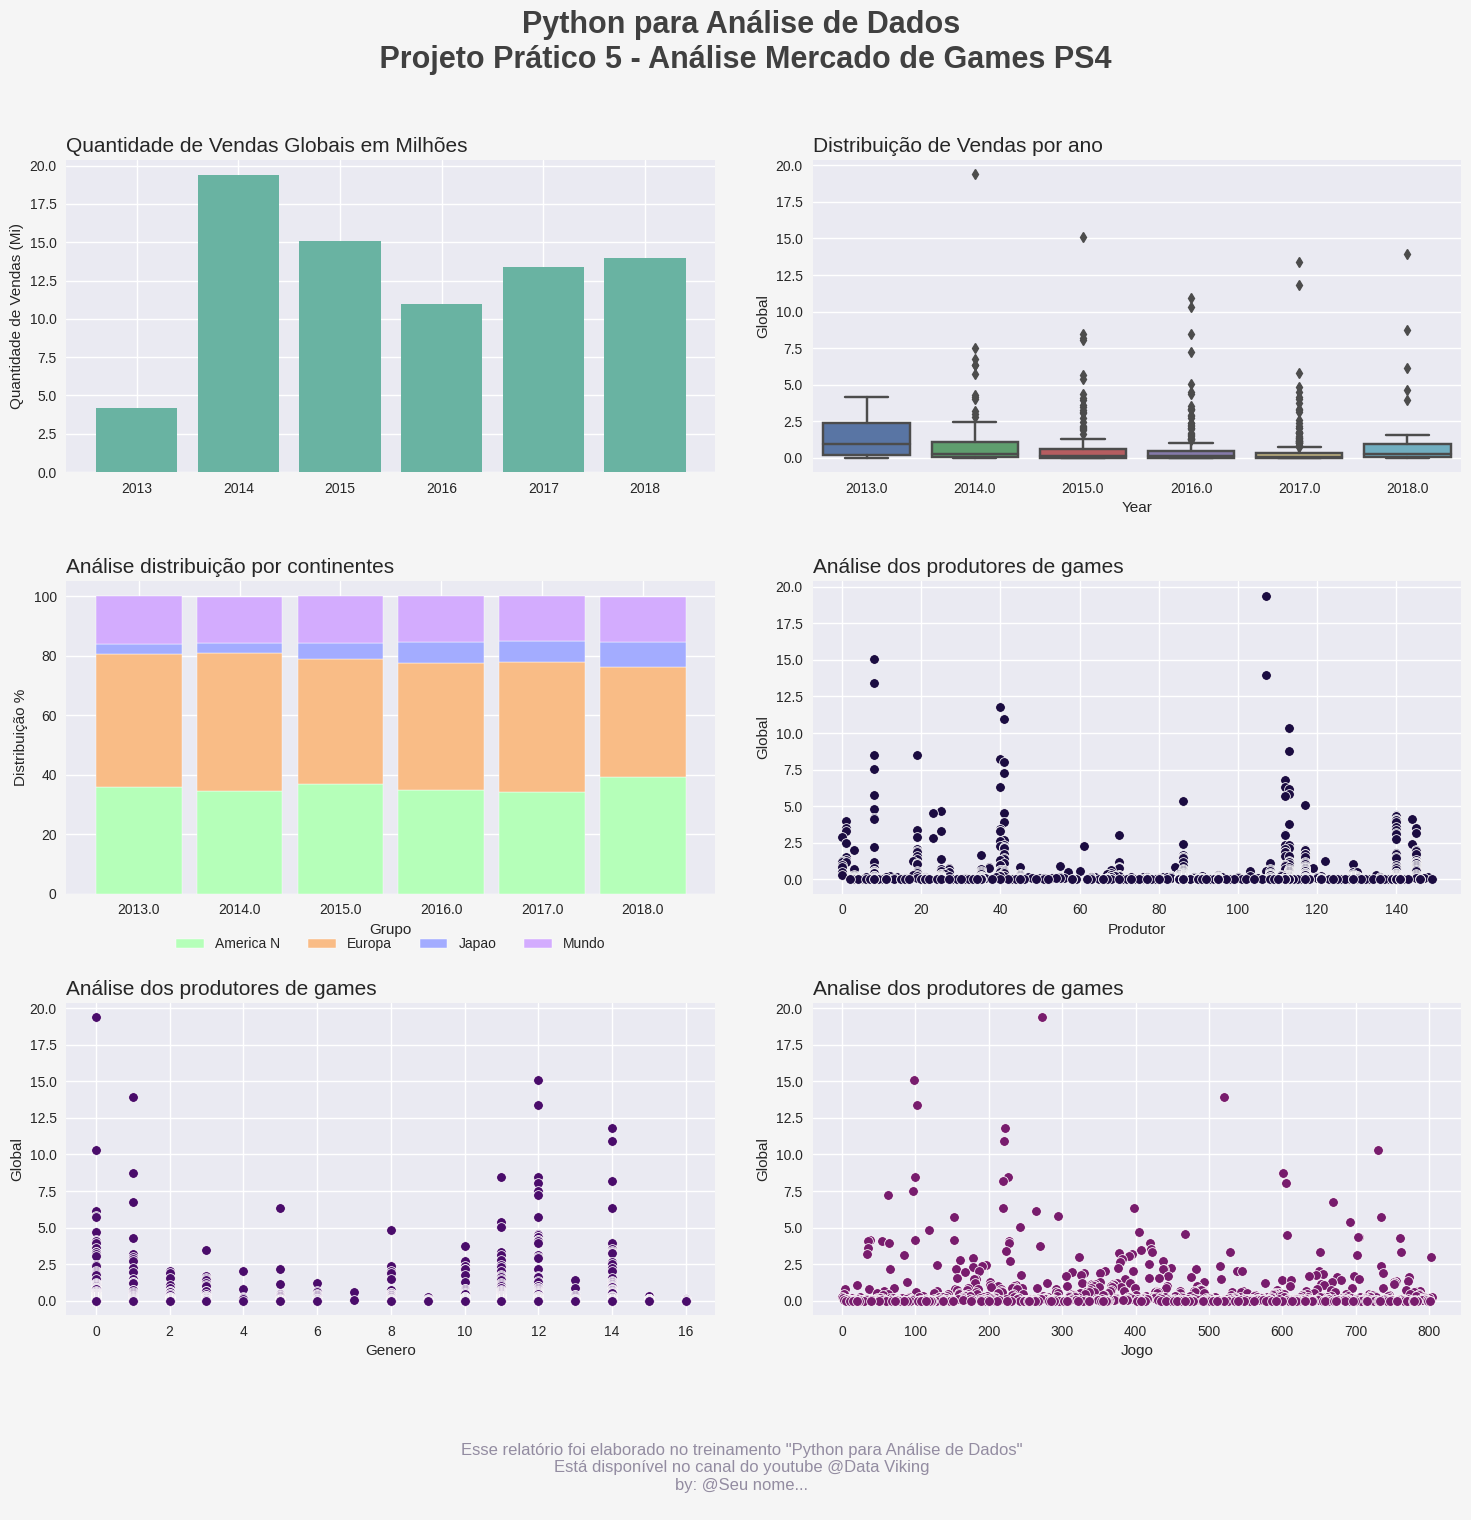

In [29]:
# Tamanho da imagem

fig, ax = plt.subplots(figsize=(18,15)) # Para geração de diversos gráficos

# Cor de Fundo
cor_fundo = "#f5f5f5"
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos Gráficos
plt.style.use("seaborn")

# Título da figura
plt.suptitle("Python para Análise de Dados\n Projeto Prático 5 - Análise Mercado de Games PS4", fontsize = 22, color="#404040", fontweight=600)

# Parâmetros para o grid
linhas = 3
colunas = 2

#=======================================================================================================================================================
# Acessando gráfico 1
plt.subplot(linhas, colunas, 1)

# Título do Gráfico
plt.title("Quantidade de Vendas Globais em Milhões", loc="left", fontsize=15)

# Gráfico
plt.bar(base_dados["Year"], base_dados["Global"], color="#69b3a2")
# o parametro "ci" serve para tirar a barrinha cinza do meio do gráfico
# Estimator mudou a escala do gráfico

# Label
plt.ylabel("Quantidade de Vendas (Mi)");

#=======================================================================================================================================================
# Acessando gráfico 2
plt.subplot(linhas, colunas, 2)

# Título
plt.title("Distribuição de Vendas por ano", loc="left", fontsize=15)

# Plot
sns.boxplot(data=base_dados, x="Year", y="Global")

#=======================================================================================================================================================
# Acessando gráfico 3
plt.subplot(linhas, colunas, 3)

# Título
plt.title("Análise distribuição por continentes", loc="left", fontsize=15)

#Largura barra do gráfico
largura_barra = 0.85
#rotulos = analise["Year"] TIVE QUE TROCAR PELO COMANDO "analise.index"
grupos = [0, 1, 2, 3, 4, 5]


#plot da América
plt.bar(grupos, America, width=largura_barra, color="#b5ffb9", edgecolor="white")

#plot da Europa
plt.bar(grupos, Europa, bottom=America, width=largura_barra, color="#f9bc86", edgecolor="white")

#plot da Japao
plt.bar(grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=largura_barra, color="#a3acff", edgecolor="white")

#plot da Resto do mundo
plt.bar(grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color="#d3acfe", edgecolor="white")

#Label
plt.xticks(grupos, analise.index)
plt.xlabel("Grupo")
plt.ylabel("Distribuição %")

# Legenda
plt.legend(["America N", "Europa", "Japao", "Mundo"], loc="upper left", bbox_to_anchor=(0.15, -0.1), ncol=4);

#=======================================================================================================================================================
# Acessando gráfico 4
plt.subplot(linhas, colunas, 4)

plt.title("Análise dos produtores de games", loc="left", fontsize=15)
sns.scatterplot(data=base_dados, x="Produtor", y="Global", color=paleta_cores[0]);

#=======================================================================================================================================================
# Acessando gráfico 5
plt.subplot(linhas, colunas, 5)

plt.title("Análise dos produtores de games", loc="left", fontsize=15)
sns.scatterplot(data=base_dados, x="Genero", y="Global", color=paleta_cores[1]);

#=======================================================================================================================================================
# Acessando gráfico 6
plt.subplot(linhas, colunas, 6)

plt.title("Analise dos produtores de games", loc="left", fontsize=15)
sns.scatterplot(data=base_dados, x="Jogo", y="Global", color=paleta_cores[2]);

#=======================================================================================================================================================
# Ajustar layout para não sobrepor os gráficos
plt.subplots_adjust(hspace = 0.35, wspace = 0.15)

# Rodapé
rodape = '''
Esse relatório foi elaborado no treinamento "Python para Análise de Dados"
Está disponível no canal do youtube @Data Viking
by: @Seu nome...
'''

# Incluindo o rodapé no relatório
fig.text(0.5, -0.02, rodape, ha="center", va="bottom", size=12, color="#938ca1");
# fig.text(largura, altura)